# Exercise 1
(with Python and _with Scikit_)

---
This notebook describes the use of __scikit__ to accomplish the same linear regression exercise

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Loading the dataset
 - ex1data.txt

In [2]:
# Loading the dataset

data = pd.read_csv('ex1data1.txt', header=None, names =['profit', 'population'] )

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
profit        97 non-null float64
population    97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
profit,97.0,8.159800,3.869884,5.0269,5.7077,6.5894,8.5781,22.203
population,97.0,5.839135,5.510262,-2.6807,1.9869,4.5623,7.0467,24.147


In [4]:
data.head()

,profit,population
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


### Using LinearRegression from sklearn
__Feature Normalization/Feature Scaling__ is already taken care of by the LinearRegression (scikit library)  
 - So we __don't__ have to manually do it! 

In [8]:
# Importing scikit library
from sklearn.linear_model import LinearRegression

In [55]:
# In this case, all entries in dataset are considered as the training set

# Assigning profit to X and population to y
X_train = data.iloc[:,:-1].values
y_train = data.iloc[:,-1].values

# Implementing LinearRegression into the dataset
lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
# Printing the results and comparing with the result obtained, using...
# gradient descent of cost function (from scratch) 

print("Using scikit, the thetas are %.7f %.7f\n" %(lm.intercept_,lm.coef_[0]))
print("Previously,\nDoing it from scratch, the thetas were -3.63029144 1.16636235")


Using scikit, the thetas are -3.8957809 1.1930336

Previously,
Doing it from scratch, the thetas were -3.63029144 1.16636235


Lets plot this model to the dataset

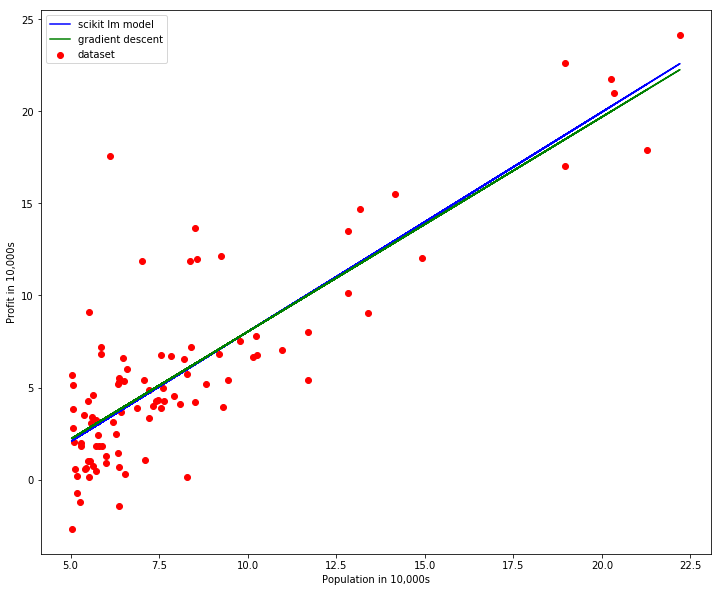

In [104]:
# PLot dataset and scikit's linear model

fig = plt.subplots(figsize= (12,10))
plt.scatter(X_train, y_train, c='red', label = 'dataset')
plt.plot(X_train, lm.predict(X_train), c='blue', label ='scikit lm model')
plt.xlabel('Population in 10,000s')
plt.ylabel('Profit in 10,000s')

# Lets add old result, from gradient descent

oldat = np.loadtxt('gradDescent.txt', delimiter=',')
plt.plot(oldat[0,:], oldat[1,:], c ='green', label='gradient descent')

# add legend
plt.legend()


  __Conclusions__
  - Basically, the gradient descent and the scikit models are __not identical__!
  - The slopes do not overlap nicely
  - This means, prediction results with the two models won't be identical (as will be tested below)

---

### Predicting new values using this model

In [41]:
# Create a test set, i.e., what to predict?
# Make an array for X_test containing 3.5 and 7.0
X_test = np.array([[3.5],[7.0]])

y_test = lm.predict(X_test)



In [49]:
# Print the result and compare with the result from scratch

print('With scikit, population 35k and 70k correspond to $%.2f and $%.2f' %(y_test[0]*10000,y_test[1]*10000 ))
print('Whereas, from scratch, we predicted 35k and 70k:  $4519.77 and $45342.45')



With scikit, population 35k and 70k correspond to $2798.37 and $44554.55
Whereas, from scratch, we predicted 35k and 70k:  $4519.77 and $45342.45
